<a href="https://colab.research.google.com/github/JPT35/CS430_Projects/blob/main/MLA5_JPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mounting to Google Drive

In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Imports for specific models

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Other Classifiers

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Imports for Splitting Data and Building Pipeline

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [20]:
from sklearn import set_config
set_config(display='diagram')

# Imports for Performance Measures

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


# Confusion Matrix Function

In [22]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')


# Acquire Data

In [83]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS-430/landsat_train.csv')

In [25]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [26]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS-430/landsat_test.csv')

In [27]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [29]:
landsat_train.describe()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
count,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,...,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000,4435.000000
mean,69.473957,83.855242,99.322886,82.555581,69.208794,83.499436,99.174521,82.480496,68.963472,83.131003,...,82.673957,69.033145,83.434273,99.183766,82.638106,68.797069,83.153326,99.061556,82.584442,3.650282
std,13.649635,22.725079,16.672166,18.695450,13.552423,22.811809,16.627583,18.714272,13.497858,22.813312,...,18.884322,13.533934,22.812090,16.741240,18.939820,13.437785,22.762684,16.660735,18.895513,2.217055
min,40.000000,27.000000,56.000000,33.000000,40.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,34.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,50.000000,29.000000,1.000000
25%,60.000000,71.000000,85.000000,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,70.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,2.000000
50%,68.000000,87.000000,101.000000,83.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,100.000000,81.000000,3.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,103.000000,...,92.000000,79.500000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,5.000000
max,104.000000,137.000000,140.000000,154.000000,102.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,154.000000,104.000000,128.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000,7.000000


# Bar plots to display the number of land types for landsat_train and landsat_test

# landsat_train:

In [30]:
landsat_train_count = landsat_train['land_type'].value_counts()

In [32]:
print(landsat_train_count)

1    1072
7    1038
3     961
2     479
5     470
4     415
Name: land_type, dtype: int64


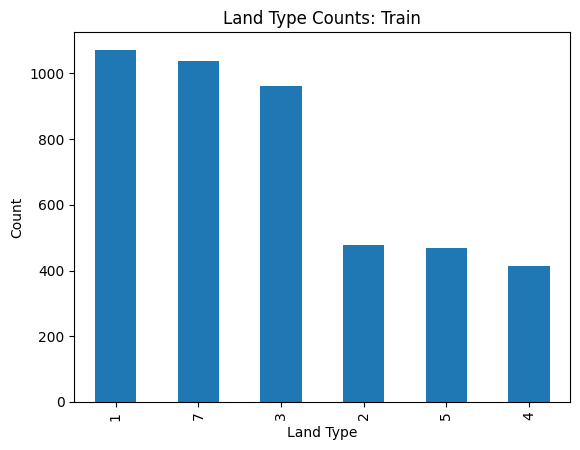

In [36]:
landsat_train_count.plot(kind='bar')
plt.title('Land Type Counts: Train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

# landsat_test:

In [34]:
landsat_test_count = landsat_test['land_type'].value_counts()

In [35]:
print(landsat_test_count)

7    470
1    461
3    397
5    237
2    224
4    211
Name: land_type, dtype: int64


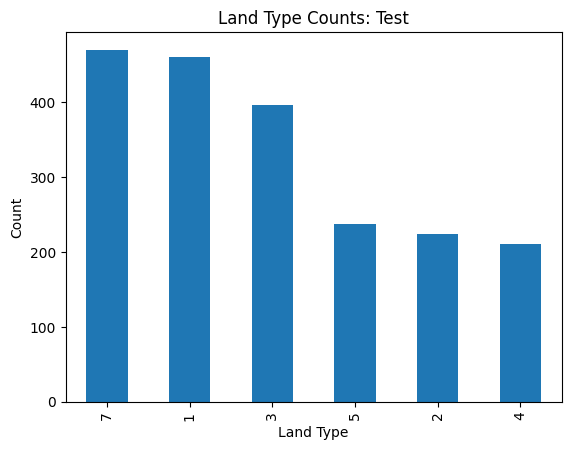

In [39]:
landsat_test_count.plot(kind='bar')
plt.title('Land Type Counts: Test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

# Splitting Data into Train/Test

In [40]:
X_train = landsat_train.drop('land_type', axis=1)

X_test = landsat_test.drop('land_type', axis=1)

y_train = landsat_train['land_type']

y_test = landsat_test['land_type']

# Building the Pipeline

In [42]:
drop = ['land_type']

In [43]:
ColTrans = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), landsat_train.drop(drop, axis=1).columns)])


In [44]:
pipeline = Pipeline(steps=[('ColTrans', ColTrans),
                              ('classifier', RandomForestClassifier())])

# Executing the model

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

# Evaluating the Model

In [46]:
y_pred = pipeline.predict(X_test)

# Precision, Recall, and F1 score:

In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.92       397
           4       0.79      0.64      0.71       211
           5       0.93      0.89      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



# Confusion Matrix heatmap:

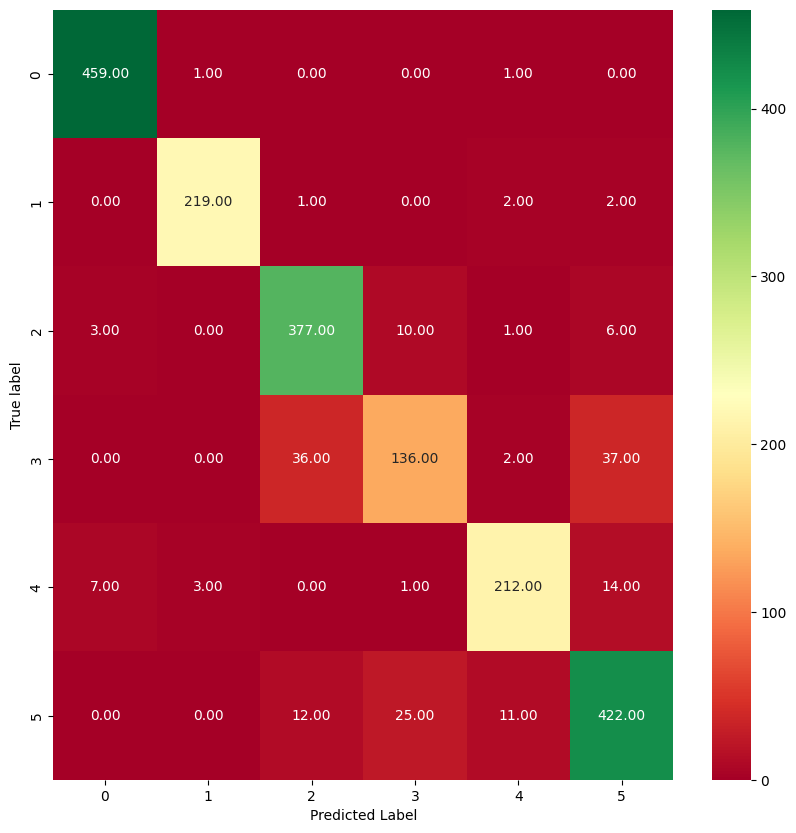

In [48]:
plot_cm(y_test, y_pred)

# Conclusion

This seems to be a suitable model for classifying the correct land type for all types in the data frame, other than land type 4.  There is also room for improvement in the model in regards to land type 5.  Land type 4 and 5 have the fewest counts in the testing and training data as shown in the bar graph printed above.  This may correlate to the model's struggles to classify these two types. 

The confusion matrix shows inconsistency for land type 4, and this is also shown in the precision, recall and F1 scores for this land type. I would say this model struggles to classify landtype 4.

Land type 5 has suffecient enough scores for precision, recall and f-1 score, but within the confusion matrix shows that the model has a fairly difficult time classying this land type correctly.  

Land types 1, 2 and 7 can be accurately clasified by this model.  



# Boosting Classifier: 

# Splitting Data:

In [84]:
X_train = landsat_train.drop('land_type', axis=1)

X_test = landsat_test.drop('land_type', axis=1)

y_train = landsat_train['land_type']

y_test = landsat_test['land_type']

# Building the Pipeline:

In [85]:
drop = ['land_type']

In [86]:
ColTrans = ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), landsat_train.drop(drop, axis=1).columns)])

In [87]:
pipeline = Pipeline(steps=[('ColTrans', ColTrans),
                               ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                                                 n_estimators=200,
                                                                 learning_rate=1.0))])

# Executing the model

In [88]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ColTrans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_le...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                    n_estimators=200))])

# Evaluating the Model

In [89]:
y_pred = pipeline.predict(X_test)

# Precision, Recall, and F1 score:

In [90]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       461
           2       0.97      0.97      0.97       224
           3       0.88      0.86      0.87       397
           4       0.54      0.59      0.56       211
           5       0.86      0.83      0.85       237
           7       0.84      0.83      0.84       470

    accuracy                           0.86      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.86      0.86      0.86      2000



# Confusion Matrix heatmap:

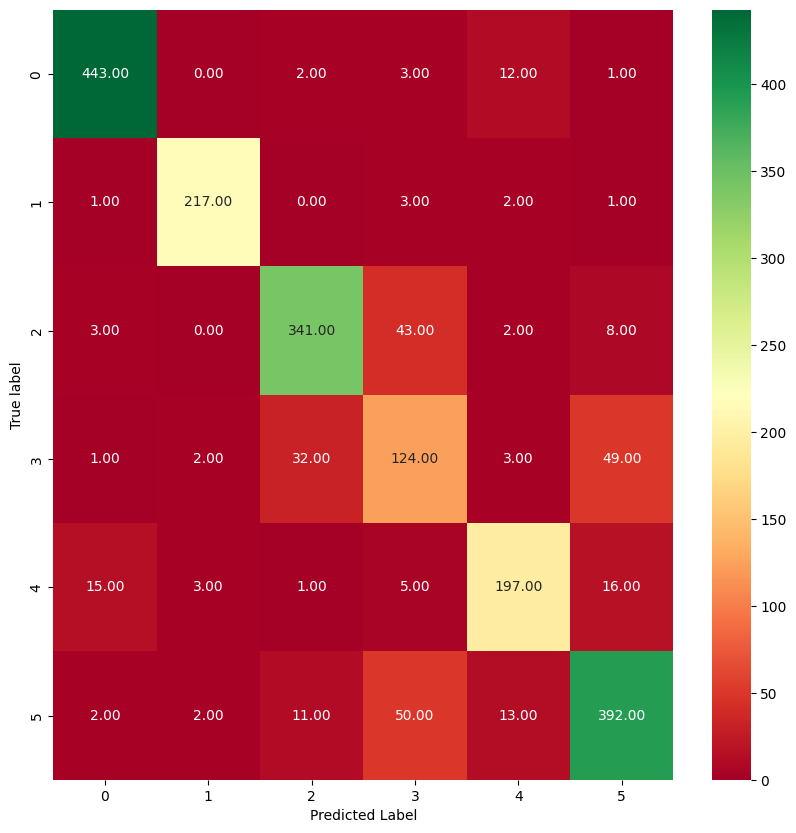

In [91]:
plot_cm(y_test, y_pred)

# Conclusion:

My conclusion for this model is similar to the model that used the RandomForestClassifer previously.  The results of the two models working with the same dataset are nearly identical.  

I would assume that the model is not accurate at predicting land type 4.  I tried setting n_estimators to different values for this model hoping to see a positive effect on the results but did not get a return that was much different.  

# Acquire Data

In [67]:
df = pd.read_csv('/content/gdrive/MyDrive/CS-430/banknote_authentication.csv')

In [68]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Bar plots to display the number of forgeries:

In [69]:
counts = df['forgery'].value_counts()

counts_df = pd.DataFrame({'Forgery': counts[1], 'No Forgery': counts[0]}, index=[0])

In [70]:
print(counts_df)

   Forgery  No Forgery
0      610         762


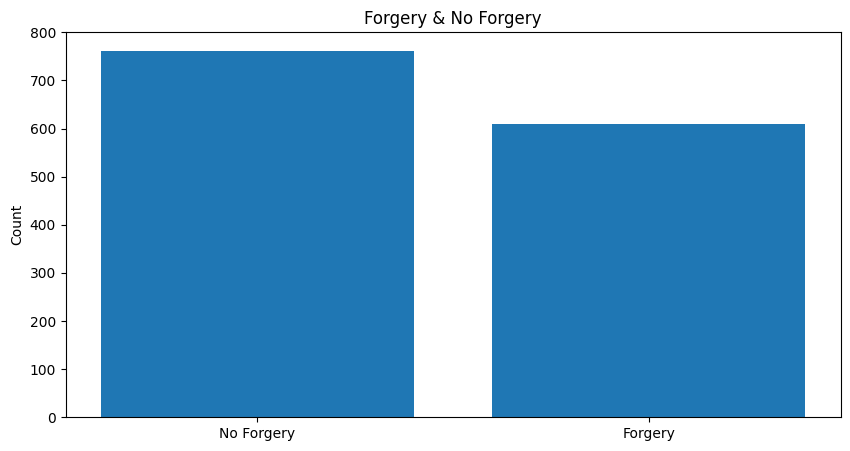

In [71]:
plt.figure(figsize=(10,5))
plt.bar(['No Forgery', 'Forgery'], counts.values)
plt.title('Forgery & No Forgery')
plt.ylabel('Count')
plt.show()

# Splitting Data into Train/Test

In [73]:
X = df.drop(['forgery'], axis=1)

y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Pipeline:

In [77]:
numerical_cols = ['variance', 'skewness', 'curtosis', 'entropy']

ColTrans = ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), numerical_cols)
    ])

In [78]:
pipeline = Pipeline(steps=[('ColTrans', ColTrans),
                              ('classifier', RandomForestClassifier())])

# Executing the model

In [79]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ColTrans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier())])

# Evaluating the Model

In [80]:
y_pred = pipeline.predict(X_test)

# Precision, Recall, and F1 score:

In [81]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Confusion Matrix heatmap:

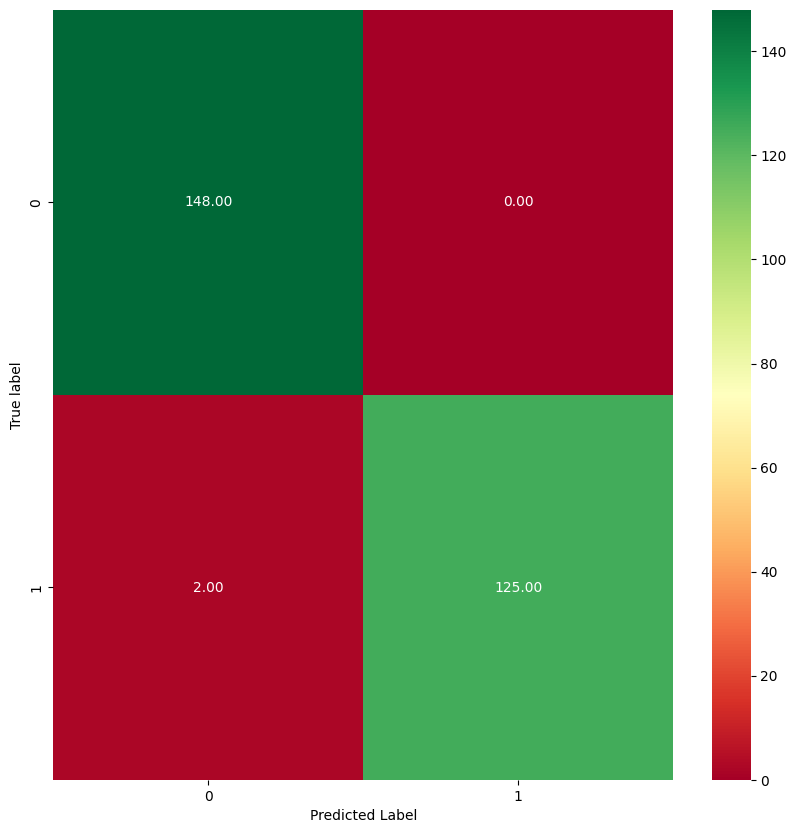

In [82]:
plot_cm(y_test, y_pred)

# Conclusion:

Using the RandomForestClassifier, the model was extremely accurate in currectly classifying forgeries and non forgery cases from the banknote document.  

The precision, recall and F-1 scores all sit comfortably above .90, and the heatmap shows only two false positive and no false negatives.  